In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
percentage <- rep(c(5, 10, 20, 50, 80), 15)
head(percentage)
measure <- rep(c(rep(c('cor'), 5), rep(c('MAE'), 5), rep(c('RMSE'), 5)), 5)
head(measure)
train_file <- (c(rep(c('lasso_std_FALSE_norm_smooth'), 15), 
                 rep(c('lasso_std_TRUE_norm_smooth'), 15), 
                 rep(c('lasso_std_TRUE_norm'), 15), 
                 rep(c('lasso_std_TRUE_norm_trimmed'), 15),
                 rep(c('lasso_std_TRUE_norm_smooth_trimmed'), 15))) 
head(train_file)

[1]  5 10 20 50 80  5

[1] "cor" "cor" "cor" "cor" "cor" "MAE"

[1] "lasso_std_FALSE_norm_smooth" "lasso_std_FALSE_norm_smooth"
[3] "lasso_std_FALSE_norm_smooth" "lasso_std_FALSE_norm_smooth"
[5] "lasso_std_FALSE_norm_smooth" "lasso_std_FALSE_norm_smooth"

In [5]:
# 5%, 10%, 20%, 50%, 80%
# cor / mae /rmse

lasso_std_FALSE_norm_smooth = c(0.4825917, 0.4924649, 0.4641108, 0.4929166, 0.4566806, 
                                0.0861319, 0.0855821, 0.0877407, 0.0855456, 0.0878149,
                                0.1100217, 0.1093784, 0.1116117, 0.1093562, 0.1117870)

lasso_std_TRUE_norm_smooth = c(0.5289937, 0.5377900, 0.5391430, 0.5397461, 0.5401635,
                               0.0828597, 0.0821836, 0.0819081, 0.0819115, 0.0818757,
                               0.1067175, 0.1057396, 0.1053722, 0.1053666, 0.1053212) 

lasso_std_TRUE_norm = c(0.5329437, 0.5374963, 0.5393780, 0.5398546, 0.5402800,
                        0.0827056, 0.0821931, 0.0819085, 0.0819063, 0.0818690,
                        0.1063478, 0.1057414, 0.1053553, 0.1053588, 0.1053122)

lasso_std_TRUE_norm_trimmed = c(0.5339980, 0.5372570, 0.5394166, 0.5401487, 0.5404296,
                                0.0826411, 0.0822263, 0.0819000, 0.0818902, 0.0818651, 
                                0.1062824, 0.1057818, 0.1053500, 0.1053298, 0.1052970)

lasso_std_TRUE_norm_smooth_trimmed = c(0.5347511, 0.5375991, 0.5393067, 0.5393896, 0.5396105,
                                       0.0826180, 0.0822159, 0.0819067, 0.0819422, 0.0819230, 
                                       0.1062725, 0.1057777, 0.1053588, 0.1053930, 0.1053659)

values = c(lasso_std_FALSE_norm_smooth, lasso_std_TRUE_norm_smooth, lasso_std_TRUE_norm, 
           lasso_std_TRUE_norm_trimmed, lasso_std_TRUE_norm_smooth_trimmed)

head(values)

[1] 0.4825917 0.4924649 0.4641108 0.4929166 0.4566806 0.0861319

In [6]:
res_tibble <- tibble(percentage = percentage, 
                     measure = measure, 
                     train_file = train_file, 
                     value = values)
head(res_tibble)
tail(res_tibble)

percentage,measure,train_file,value
5,cor,lasso_std_FALSE_norm_smooth,0.4825917
10,cor,lasso_std_FALSE_norm_smooth,0.4924649
20,cor,lasso_std_FALSE_norm_smooth,0.4641108
50,cor,lasso_std_FALSE_norm_smooth,0.4929166
80,cor,lasso_std_FALSE_norm_smooth,0.4566806
5,MAE,lasso_std_FALSE_norm_smooth,0.0861319


percentage,measure,train_file,value
80,MAE,lasso_std_TRUE_norm_smooth_trimmed,0.0819230
5,RMSE,lasso_std_TRUE_norm_smooth_trimmed,0.1062725
10,RMSE,lasso_std_TRUE_norm_smooth_trimmed,0.1057777
20,RMSE,lasso_std_TRUE_norm_smooth_trimmed,0.1053588
50,RMSE,lasso_std_TRUE_norm_smooth_trimmed,0.1053930
80,RMSE,lasso_std_TRUE_norm_smooth_trimmed,0.1053659


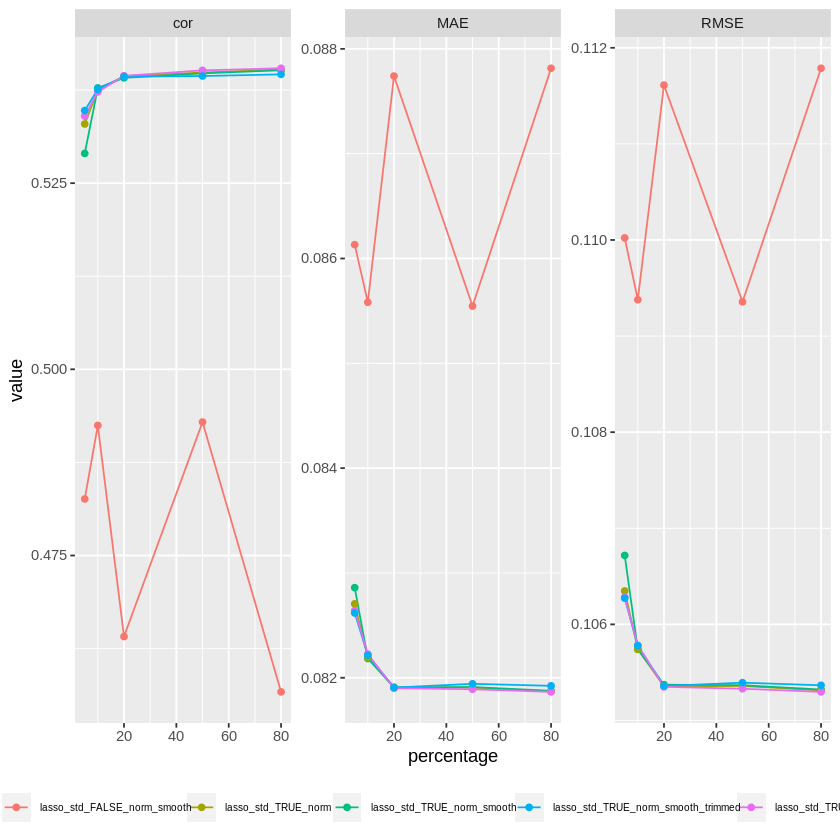

In [7]:
ggplot(res_tibble) + 
    geom_line(aes(x = percentage, y = value, color = train_file)) + 
    geom_point(aes(x = percentage, y = value, color = train_file)) + 
    facet_wrap(~measure, scales = "free") + 
    theme(legend.title = element_blank(), 
          legend.text = element_text(size = 6), 
          legend.position="bottom")

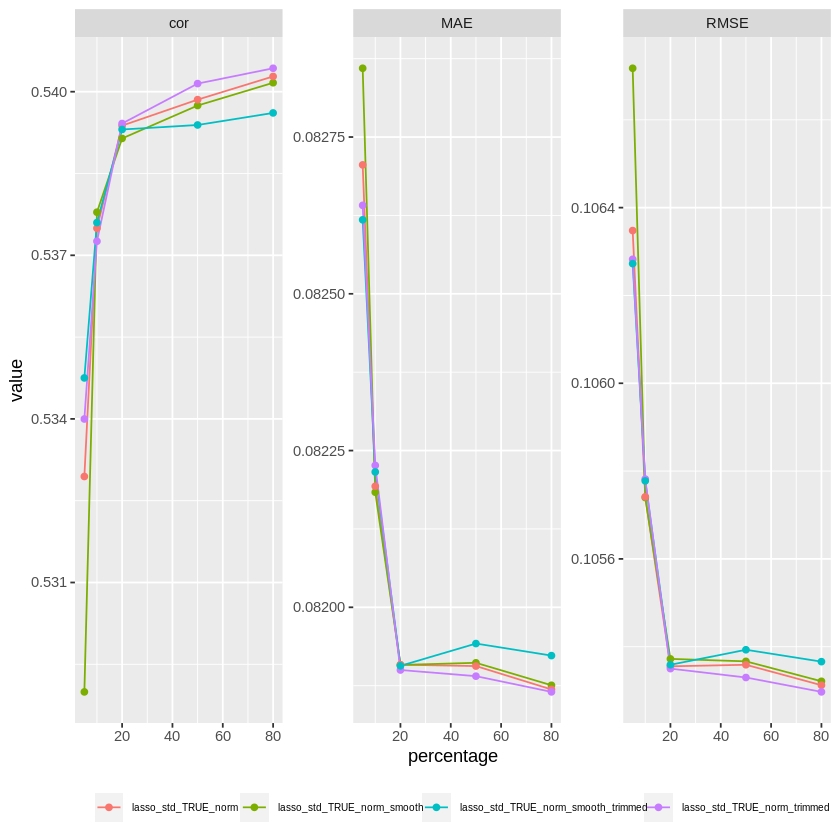

In [12]:
res_tibble %>% filter(train_file != 'lasso_std_FALSE_norm_smooth') %>% 
ggplot() + 
    geom_line(aes(x = percentage, y = value, color = train_file)) + 
    geom_point(aes(x = percentage, y = value, color = train_file)) + 
    facet_wrap(~measure, scales = "free") + 
    theme(legend.title = element_blank(), 
          legend.text = element_text(size = 6), 
          legend.position="bottom")

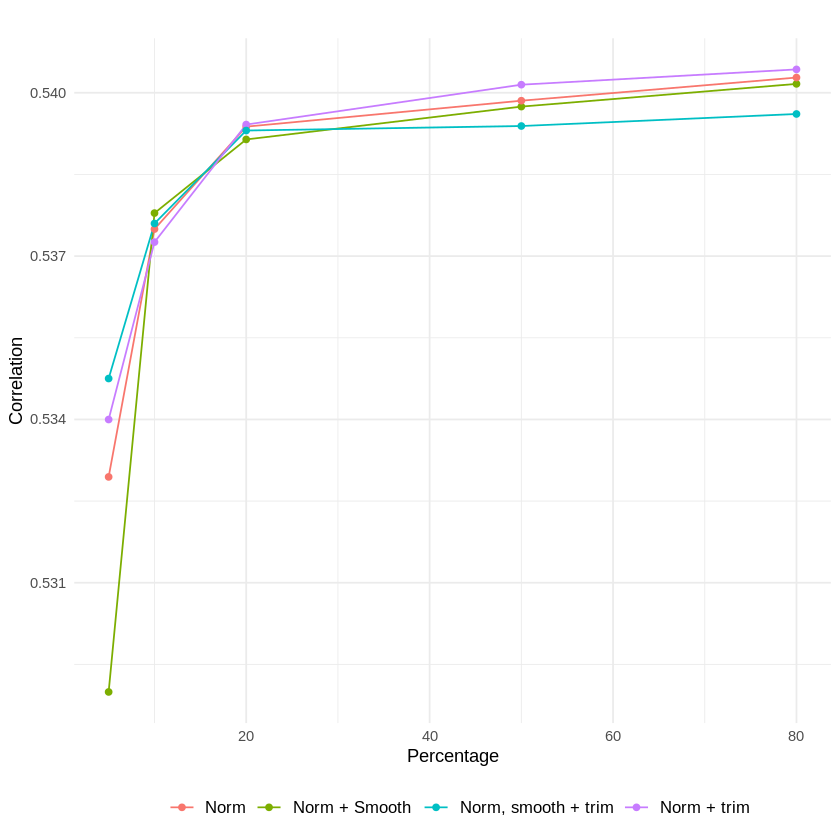

In [34]:
res_tibble %>% filter(train_file != 'lasso_std_FALSE_norm_smooth') %>% filter(measure == "cor")%>%
ggplot() +  theme_minimal() +
    geom_line(aes(x = percentage, y = value, color = train_file)) + 
    geom_point(aes(x = percentage, y = value, color = train_file)) + 
    theme(legend.title = element_blank(), 
          legend.text = element_text(size = 10), 
          legend.position="bottom")  + xlab("Percentage") + ylab("Correlation") + ggtitle("")  + scale_color_hue(labels = c("Norm", "Norm + Smooth", "Norm, smooth + trim", "Norm + trim"))